In [86]:
import tarfile
from functools import partial
from collections import Counter

import pandas as pd
from nltk import edit_distance
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
PATH = "errors.tar.gz"

In [40]:
def read_data(path: str) -> pd.DataFrame:
    with tarfile.open(path, "r:*") as file:
        path = file.getnames()[0]
        data = pd.read_json(file.extractfile(path), lines=True, orient="records")
        data.rename(columns={"index": "example_index"}, inplace=True)
        data.drop("match", axis=1, inplace=True)
        return data

In [41]:
def common_errors(data: pd.DataFrame, train_type: str, n: int, ascending: bool) -> pd.DataFrame:
    data = data.loc[data.train_type == train_type]
    errors = data.pivot_table(index="example_index", aggfunc="size").sort_values(ascending=ascending).head(n)
    data = data.loc[data.example_index.isin(errors.index)].drop_duplicates("original").sort_values("original")
    return data

top_50_errors = partial(common_errors, n=50, ascending=False)

In [42]:
def error_edit_distance(data: pd.DataFrame) -> pd.DataFrame:
    distances = data.apply(lambda x: edit_distance(x["segmented"], x["predicted_segmented"]), axis=1)
    data = data.copy()
    data["distances"] = distances
    return data

In [43]:
data = read_data(PATH)

In [44]:
data = error_edit_distance(data)

In [53]:
data.groupby(["model_name", "train_type"]).agg({"distances": ["mean", "max", "std"]})

distances              
                                         mean max       std
model_name           train_type                            
CnnCrfTagger         forms           1.361602   8  0.654444
                     forms_shuffled  1.361129   6  0.628026
                     lemmas          1.360356   6  0.645567
CnnTagger            forms           1.299315   6  0.589733
                     forms_shuffled  1.087921   4  0.319349
                     lemmas          1.247660   5  0.531205
LstmCrfTagger        forms           1.319818   5  0.620323
                     forms_shuffled  1.135021   3  0.393818
                     lemmas          1.292251   5  0.565025
LstmTagger           forms           1.311405   7  0.609300
                     forms_shuffled  1.126794   4  0.386461
                     lemmas          1.277228   5  0.565164
TransformerCrfTagger forms           1.326726   7  0.627012
                     forms_shuffled  1.179487   4  0.474507
                     lemmas          1.299590   5  0.612425
TransformerTagger    forms           1.327959   6  0.643754
                     forms_shuffled  1.129870   3  0.385069
                     lemmas          1.258795   6  0.562174

In [62]:
p = sns.load_dataset("penguins")

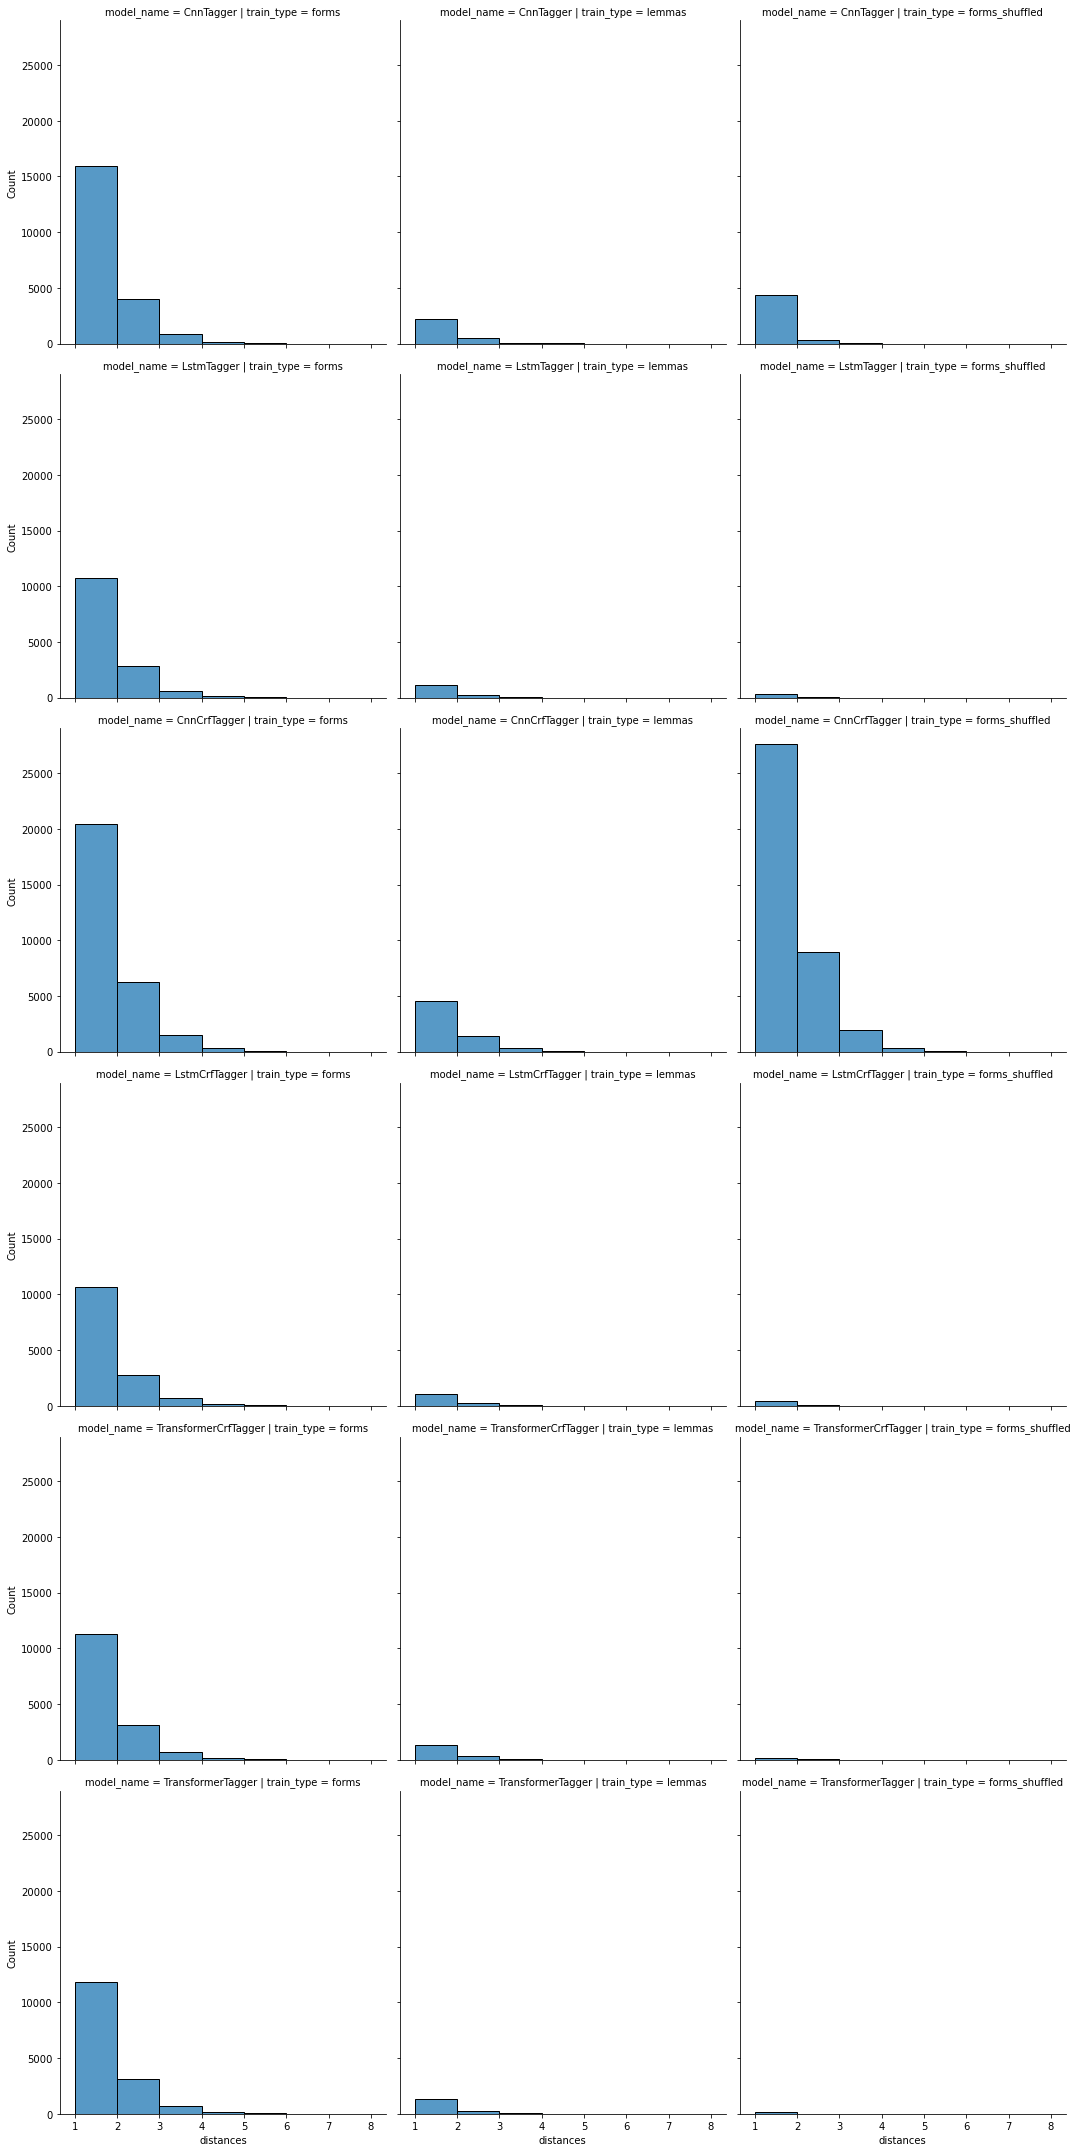

In [72]:
sns.displot(data, x="distances", col="train_type", row="model_name", binwidth=1, multiple="dodge")

In [73]:
def tag_freq_dist(data, train_type):
    pass

In [79]:
c = Counter()

In [80]:
data.bmes.apply(lambda x: c.update(x))

0         None
1         None
2         None
3         None
4         None
          ... 
169518    None
169519    None
169520    None
169521    None
169522    None
Name: bmes, Length: 169523, dtype: object

<AxesSubplot:>

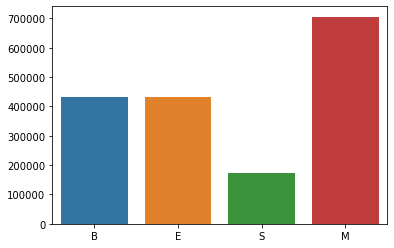

In [92]:
sns.barplot(x=list(c.keys()), y=list(c.values()))

In [15]:
top_50_errors(data, "lemmas").head()

,experiment_id,model_name,train_type,example_index,original,segmented,bmes,predicted_segmented,predicted_bmes,match
109700,22c9476510ed47f78ae032466f003a56,CnnTagger,lemmas,1539,акванавт,аква|навт,BMMEBMME,акванавт,BMMMBMME,False
109734,22c9476510ed47f78ae032466f003a56,CnnTagger,lemmas,3328,америций,америц|ий,BMMMMEBE,амер|иций,BMMEMMME,False
110892,22c9476510ed47f78ae032466f003a56,CnnTagger,lemmas,10556,беспечность,беспечн|ость,BMMMMMEBMME,бес|печ|н|ость,BMEMMESBMME,False
111070,22c9476510ed47f78ae032466f003a56,CnnTagger,lemmas,6476,бессарабский,бессараб|ск|ий,BMMMMMMEBEBE,бес|сараб|ск|ий,BMEBMMMEBEBE,False
110295,22c9476510ed47f78ae032466f003a56,CnnTagger,lemmas,13646,буденовка,буден|овк|а,BMMMEBMES,буд|ен|ов|к|а,BMEMEBESS,False


In [20]:
top_50_errors(data, "forms").head()

,experiment_id,model_name,train_type,example_index,original,segmented,bmes,predicted_segmented,predicted_bmes,match
11713,6065532c2339450687d5f6d2be65386e,CnnTagger,forms,50640,аблефариях,а|блефари|ях,SBMMMMMEBE,аблефари|ях,BMMMMMMEBE,False
1056,6065532c2339450687d5f6d2be65386e,CnnTagger,forms,34097,актора,акт|ор|а,BMEBES,актор|а,BMMMES,False
17856,6065532c2339450687d5f6d2be65386e,CnnTagger,forms,50549,аллоиммунитет,алло|иммун|итет,BMMEBMMMEBMME,алл|о|иммун|и|тет,BMESBMMMEEMME,False
3938,6065532c2339450687d5f6d2be65386e,CnnTagger,forms,10377,америцию,америц|и|ю,BMMMMESS,амер|ици|ю,BMMEBMES,False
20276,6065532c2339450687d5f6d2be65386e,CnnTagger,forms,50472,аспектуальностям,аспектуальн|ост|ям,BMMMMMMMMMEBMEBE,аспект|у|альн|ост|ям,BMMMMESMMMEBMEBE,False


In [22]:
top_50_errors(data, "forms_shuffled").head()

,experiment_id,model_name,train_type,example_index,original,segmented,bmes,predicted_segmented,predicted_bmes,match
126562,a18d840b69794ffbb048fc1da85fa35f,CnnTagger,forms_shuffled,38248,агрокружок,агро|кружок,BMMEBMMMME,агро|круж|ок,BMMEBMMEBE,False
125049,a18d840b69794ffbb048fc1da85fa35f,CnnTagger,forms_shuffled,55370,агроном,агро|ном,BMMEBME,агро|н|ом,BMMEEBE,False
124721,a18d840b69794ffbb048fc1da85fa35f,CnnTagger,forms_shuffled,46935,алкану,алкан|у,BMMMES,алк|ан|у,BMEBES,False
124652,a18d840b69794ffbb048fc1da85fa35f,CnnTagger,forms_shuffled,21148,аналою,анало|ю,BMMMES,анал|о|ю,BMMEEE,False
124855,a18d840b69794ffbb048fc1da85fa35f,CnnTagger,forms_shuffled,11157,бальзам,бальзам,BMMMMME,бальз|ам,BMMMEBE,False
